# Key factors that influence US home prices *nationally*
Developing a data science model to analyze the primary factors affecting the national housing prices in the United States over the past two decades using the S&P Case-Shiller Home Price Index as a representation of home prices.

![image](factors-affecting-house-prices.jpg)

The dataset encompasses critical factors that have the potential to impact residential home prices over the past two decades in the United States. These factors can be broadly categorized into two groups: Supply and Demand.

The S&P Case-Shiller Housing Price Index (CSUSHPISA) chosen as the dependent variable, serving as an indicator of price fluctuations.

# 1. Data Cleaning and handling missing values

In [152]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
# Importing dataset
sup = pd.read_csv("supply.csv")
dem = pd.read_csv("demand.csv")

The supply dataset contains columns that indicate:
- DATE: Date of the data point.
- CSUSHPISA: S&P Case-Shiller Housing Price Index for residential properties.
- MSACSR: Monthly Supply of New Houses in the United States.
- PERMIT: Number of residential building permits issued.
- TLRESCONS: Total residential construction expenditure or cost.
- EVACANTUSQ176N: Number of vacant housing units in the United States.

The demand dataset contains columns that indicate:
- DATE: Date of the data point.
- CSUSHPISA: S&P Case-Shiller Housing Price Index for residential properties.
- MORTGAGE30US: 30-Year Fixed-Rate Mortgage Average in the United States.
- UMCSENT: University of Michigan Consumer Sentiment Index.
- INTDSRUSM193N: Effective Federal Funds Rate (Interest Rate).
- MSPUS: Median Sales Price of Houses Sold in the United States.
- GDP: Gross Domestic Product of the United States.

In [154]:
# Merging both dataset
df = sup.merge(dem,on='DATE')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            81 non-null     object 
 1   CSUSHPISA_x     81 non-null     object 
 2   MSACSR          81 non-null     object 
 3   PERMIT          81 non-null     object 
 4   TLRESCONS       81 non-null     object 
 5   EVACANTUSQ176N  81 non-null     object 
 6   CSUSHPISA_y     80 non-null     float64
 7   MORTGAGE30US    81 non-null     float64
 8   UMCSENT         81 non-null     float64
 9   INTDSRUSM193N   74 non-null     float64
 10  MSPUS           81 non-null     int64  
 11  GDP             81 non-null     float64
dtypes: float64(5), int64(1), object(6)
memory usage: 7.7+ KB


In [155]:
df.drop(columns = ['CSUSHPISA_y'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            81 non-null     object 
 1   CSUSHPISA_x     81 non-null     object 
 2   MSACSR          81 non-null     object 
 3   PERMIT          81 non-null     object 
 4   TLRESCONS       81 non-null     object 
 5   EVACANTUSQ176N  81 non-null     object 
 6   MORTGAGE30US    81 non-null     float64
 7   UMCSENT         81 non-null     float64
 8   INTDSRUSM193N   74 non-null     float64
 9   MSPUS           81 non-null     int64  
 10  GDP             81 non-null     float64
dtypes: float64(4), int64(1), object(6)
memory usage: 7.1+ KB


In [156]:
#rename the column

df.rename(columns={'CSUSHPISA_x':'Home_price_index','MSACSR':'Monthly_supply','PERMIT':'Permit'\
                   ,'TLRESCONS':'Total_consumption spending'
                  ,'EVACANTUSQ176N':'Housing_inventory','MORTGAGE30US':'30y_mortgage','UMCSENT':'Consumer_sentiment'\
                   ,'INTDSRUSM193N':'Interest_rates','MSPUS':'Median_sales_price','DATE':'Date'},inplace = True)

In [157]:
df.head()

,Date,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895,5.597500,98.000000,2.000000,212700,11923.447


In [158]:
from sklearn.linear_model import LinearRegression

# Assuming 'df_complete' contains the complete data
X = df[['Median_sales_price', 'GDP']]  # Replace with your actual predictor columns
y = df['Interest_rates']
test_size = 7

# Split the data into training and test sets
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]
# Create and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [159]:
df_pred = model.predict(X_test)
df_pred = pd.DataFrame(df_pred, columns=['Predicted_Interest'])
df_pred

,Predicted_Interest
0,2.647884
1,2.525346
2,2.629083
3,2.948787
4,3.417219
5,3.596288
6,1.260070


In [160]:
modified_df = df.copy()

nan_indices = modified_df[modified_df['Interest_rates'].isna()].index

# Replace NaN values in 'Interest_rates' with predicted values using the indices
modified_df.loc[nan_indices, 'Interest_rates'] = df_pred['Predicted_Interest'].values
# Replace "." with "X" in the 'Column_Name'
modified_df.tail()

,Date,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
76,01-01-2022,290.868,6.233333333,1864,910611,15166,3.822308,63.133333,2.629083,433100,24740.480
77,01-04-2022,303.4226667,8.7,1734.666667,947300.3333,15286,5.266154,57.866667,2.948787,449300,25248.476
78,01-07-2022,301.7263333,9.566666667,1610.666667,910346,15306,5.623077,56.100000,3.417219,468000,25723.941
79,01-10-2022,297.8966667,9.2,1455.333333,870620.6667,14554,6.664615,58.800000,3.596288,479500,26137.992
80,01-01-2023,.,8.033333333,1424.333333,842559.6667,15053,6.372308,64.633333,1.260070,436800,26465.865


In [161]:
modified_df.drop(80, inplace=True)

In [162]:
modified_df.tail()

,Date,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
75,01-10-2021,277.317,6.233333333,1816.666667,837069,14999,3.079231,69.900000,2.525346,423600,24349.121
76,01-01-2022,290.868,6.233333333,1864,910611,15166,3.822308,63.133333,2.629083,433100,24740.480
77,01-04-2022,303.4226667,8.7,1734.666667,947300.3333,15286,5.266154,57.866667,2.948787,449300,25248.476
78,01-07-2022,301.7263333,9.566666667,1610.666667,910346,15306,5.623077,56.100000,3.417219,468000,25723.941
79,01-10-2022,297.8966667,9.2,1455.333333,870620.6667,14554,6.664615,58.800000,3.596288,479500,26137.992


In [163]:
#converting into mumerical standard data where float data type and upto decimal 1 using .round(1)
df = pd.read_csv('modified_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Home_price_index'] = df['Home_price_index'].astype(float).round(1)
df['Monthly_supply']=df['Monthly_supply'].astype(float).round(1)
df['Permit']=df['Permit'].astype(float).round(1)
df['Total_consumption spending']=df['Total_consumption spending'].astype(float).round(1)
df['Housing_inventory']=df['Housing_inventory'].astype(float).round(1)
df['30y_mortgage']=df['30y_mortgage'].astype(float).round(1)
df['Consumer_sentiment']=df['Consumer_sentiment'].astype(float).round(1)
df['Interest_rates']=df['Interest_rates'].astype(float).round(1)
df['Median_sales_price']=df['Median_sales_price'].astype(float).round(1)
df['GDP']=df['GDP'].astype(float).round(1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        80 non-null     datetime64[ns]
 1   Home_price_index            80 non-null     float64       
 2   Monthly_supply              80 non-null     float64       
 3   Permit                      80 non-null     float64       
 4   Total_consumption spending  80 non-null     float64       
 5   Housing_inventory           80 non-null     float64       
 6   30y_mortgage                80 non-null     float64       
 7   Consumer_sentiment          80 non-null     float64       
 8   Interest_rates              80 non-null     float64       
 9   Median_sales_price          80 non-null     float64       
 10  GDP                         80 non-null     float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 7.0 KB


# 2. Data Visualization

[Text(0.5, 0, 'Year'), Text(0.5, 1.0, 'Monthly supply over the years')]

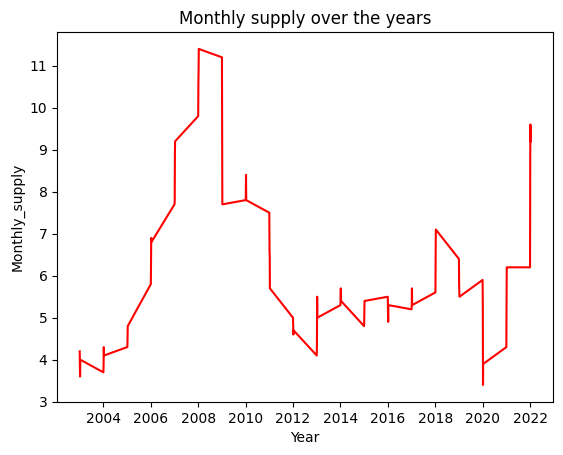

In [164]:
import warnings

# Filter out future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.lineplot(data=df,x='Date',y='Monthly_supply',color='red').set(xlabel = 'Year',title='Monthly supply over the years')
# this plot shows the monthly supply over the last 20 years

[Text(0.5, 0, 'Year'), Text(0.5, 1.0, 'GDP over the last 20 years')]

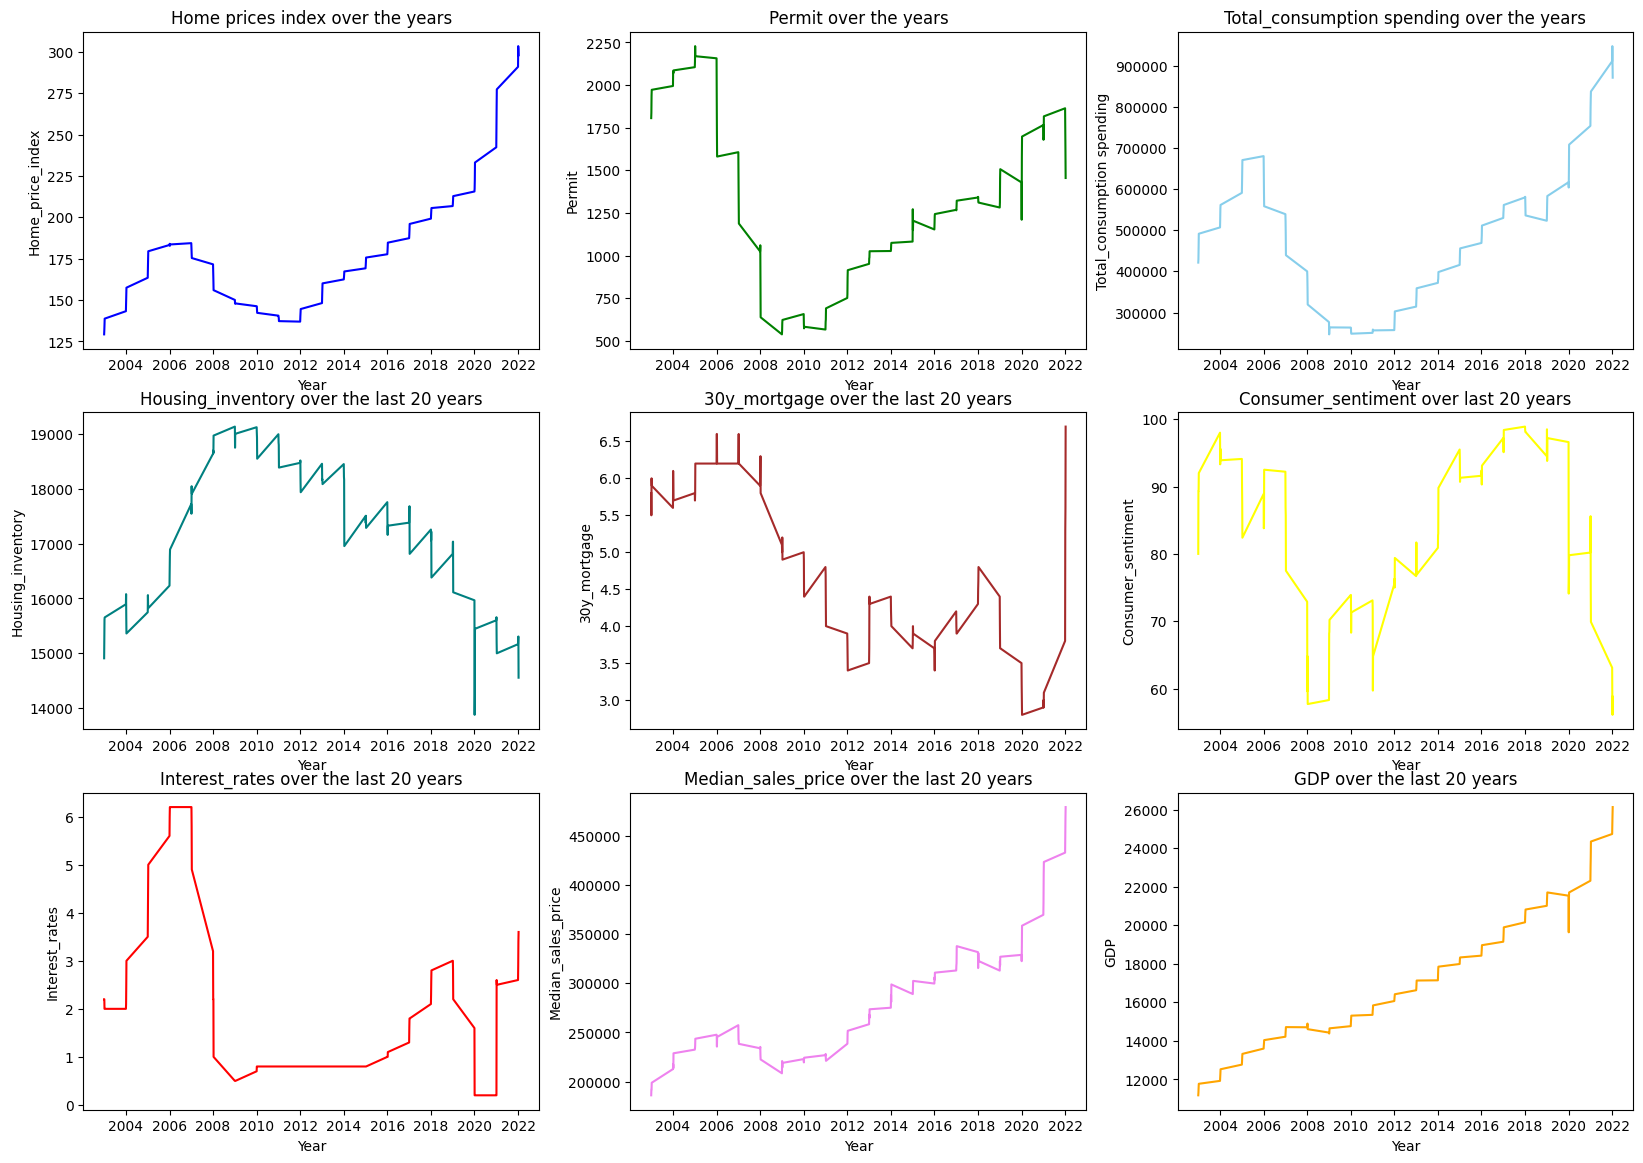

In [165]:
#ploting the data in single fig using pyplot
figure,ax = plt.subplots(nrows=3,ncols=3,figsize=(20,14))
sns.lineplot(ax = ax[0,0],data=df,x='Date',y='Home_price_index',color='blue').set(xlabel = 'Year',title='Home prices index over the years')
sns.lineplot(ax = ax[0,1],data=df,x='Date',y='Permit',color='green').set(xlabel = 'Year',title='Permit over the years')
sns.lineplot(ax = ax[0,2],data=df,x='Date',y='Total_consumption spending',color='skyblue').set(xlabel = 'Year',title='Total_consumption spending over the years')

sns.lineplot(ax = ax[1,0],data =df,x='Date',y='Housing_inventory', color = 'teal').set(xlabel = 'Year',title='Housing_inventory over the last 20 years')
sns.lineplot(ax = ax[1,1],data=df,x='Date',y='30y_mortgage', color = 'brown').set(xlabel = 'Year',title='30y_mortgage over the last 20 years')
sns.lineplot(ax = ax[1,2],data=df,x='Date',y='Consumer_sentiment',color = 'yellow').set(xlabel = 'Year',title='Consumer_sentiment over last 20 years')

sns.lineplot(ax = ax[2,0],data=df,x='Date',y='Interest_rates', color = 'red').set(xlabel = 'Year',title='Interest_rates over the last 20 years')
sns.lineplot(ax = ax[2,1],data=df,x='Date',y='Median_sales_price', color = 'violet').set(xlabel = 'Year',title='Median_sales_price over the last 20 years')
sns.lineplot(ax = ax[2,2],data=df,x='Date',y='GDP', color = 'orange').set(xlabel = 'Year',title='GDP over the last 20 years')

In [166]:
# relation betweeen the factors impacted the home prices for last 20 years

correlation = df.drop('Date',axis=1)
correlation.head(5)

,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,129.3,4.2,1806.3,421328.7,14908.0,5.8,80.0,2.2,186000.0,11174.1
1,131.8,3.8,1837.7,429308.7,15244.0,5.5,89.3,2.2,191800.0,11312.8
2,135.0,3.6,1937.3,458890.0,15614.0,6.0,89.3,2.0,191900.0,11566.7
3,138.8,4.0,1972.3,491437.3,15654.0,5.9,92.0,2.0,198800.0,11772.2
4,143.3,3.7,1994.7,506856.3,15895.0,5.6,98.0,2.0,212700.0,11923.4


[Text(0.5, 1.0, 'Correlation between factors impacted the home price')]

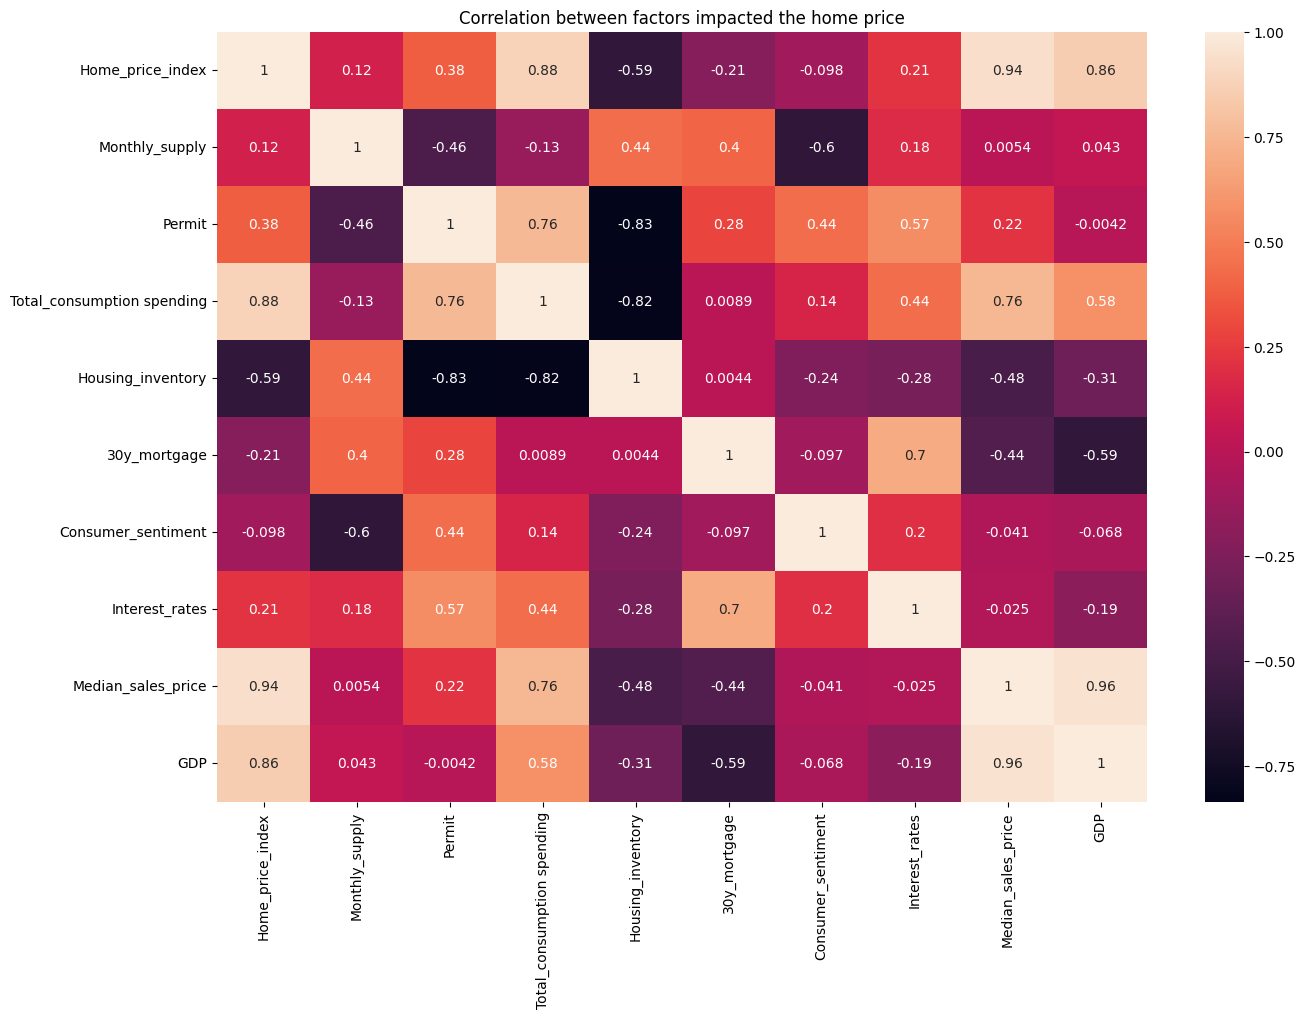

In [167]:
corr = correlation.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data=corr,annot=True).set(title='Correlation between factors impacted the home price')

To explain the relationship between columns in the data and Home_price_index (S&P/Case-Shiller U.S. National Home Price Index), the analysis of correlation coefficients with sufficient values are provided.

- GDP: Positive correlation (0.86): There is a strong positive relationship between the GDP of the country and Home_price_index. Higher GDP is strongly associated with higher home prices.

- Total_consumption spending (Total Construction Spending: Residential): Strong positive correlation (0.88): There is a strong positive relationship between total construction spending on residential projects and Home_price_index. This suggests that higher construction spending is strongly associated with higher home prices.

- Housing_inventory (vacant housing units): Negative correlation (-0.59): There is a moderate negative relationship between the number of vacant housing units and Home_price_index. This indicates that a higher number of vacant housing units may exert downward pressure on home prices.

- 30y_mortgage (30-Year Fixed Rate Mortgage Average): Positive correlation (-0.21): There is a weak negative relationship between mortgage interest rates and Home_price_index. It suggests that there is no such realtionship but intutively we know that as it increases the prices are increased to adjust the inflation.


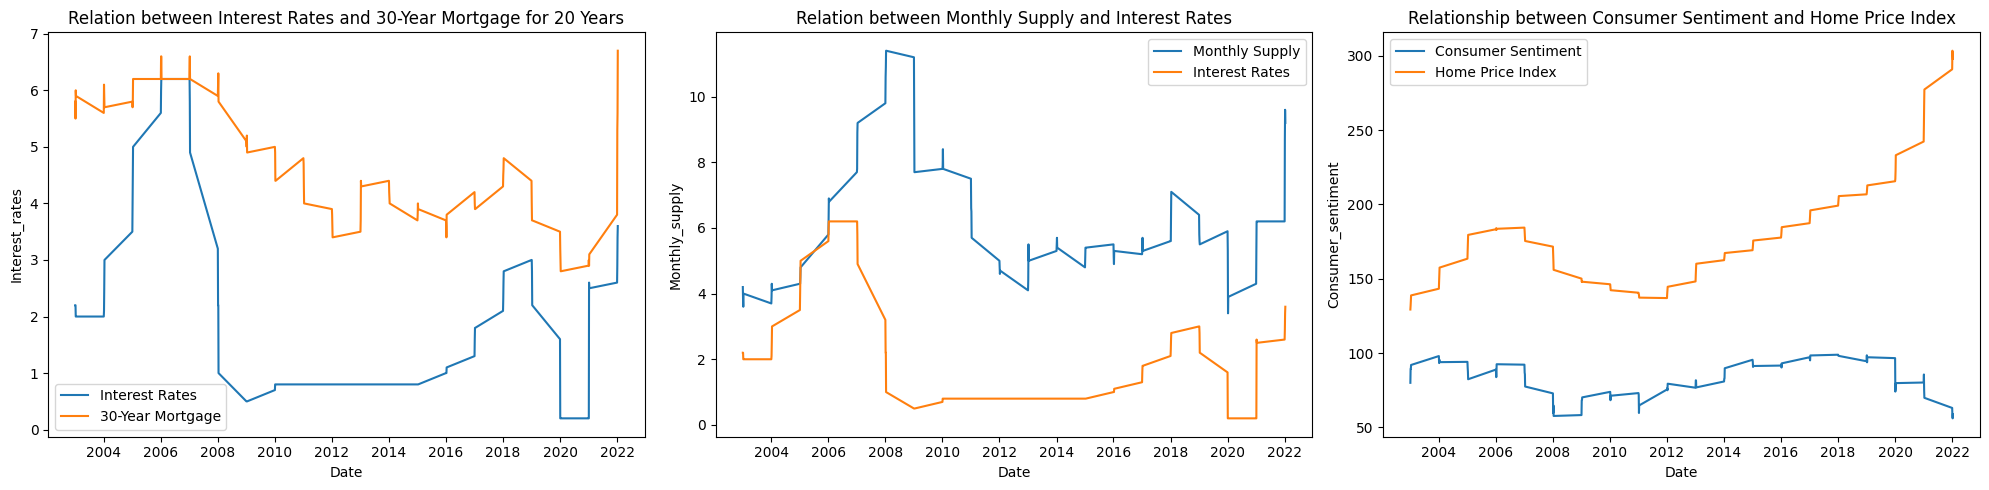

In [168]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Plot the first set of data with a label
sns.lineplot(ax=ax[0], data=df, x='Date', y='Interest_rates', label='Interest Rates')

# Plot the second set of data with a label and title
sns.lineplot(ax=ax[0], data=df, x='Date', y='30y_mortgage', label='30-Year Mortgage')
ax[0].set_title('Relation between Interest Rates and 30-Year Mortgage for 20 Years')
ax[0].legend()  # Add a legend

# Plot the second set of data with a label
sns.lineplot(ax=ax[1], x='Date', y='Monthly_supply', data=df, label='Monthly Supply')

# Plot the second set of data with a label and title
sns.lineplot(ax=ax[1], x='Date', y='Interest_rates', data=df, label='Interest Rates')
ax[1].set_title('Relation between Monthly Supply and Interest Rates')
ax[1].legend()  # Add a legend

# Plot the third set of data with a label
sns.lineplot(ax=ax[2], x='Date', y='Consumer_sentiment', data=df, label='Consumer Sentiment')

# Plot the third set of data with a label and title
sns.lineplot(ax=ax[2], x='Date', y='Home_price_index', data=df, label='Home Price Index')
ax[2].set_title('Relationship between Consumer Sentiment and Home Price Index')
ax[2].legend()  # Add a legend

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [169]:
df['Date'] = modified_df['Date']

In [170]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [171]:
df1 = df.copy()

In [172]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[['GDP', 'Home_price_index']] = scaler.fit_transform(df1[['GDP', 'Home_price_index']])


data = [go.Scatter(x = df1['Date'], y = df1['Home_price_index'],name = 'Housing Price'),
        #go.Scatter(x = df['Date'], y = df['Monthly_supply'], name = 'Supply of Houses'),
        go.Scatter(x = df1['Date'], y = df1['GDP'], name = 'GDP'),
        #go.Scatter(x = df['Date'], y = df['Monthly_supply'], name = 'Houses for Sale'),
                       
       ]
       
layout = {'title': 'Key factors governnig House Price', 'font': dict(size=16),'xaxis':{'range':['01-01-2003','01-10-2022']}}

py.iplot({'data':data,'layout': layout})

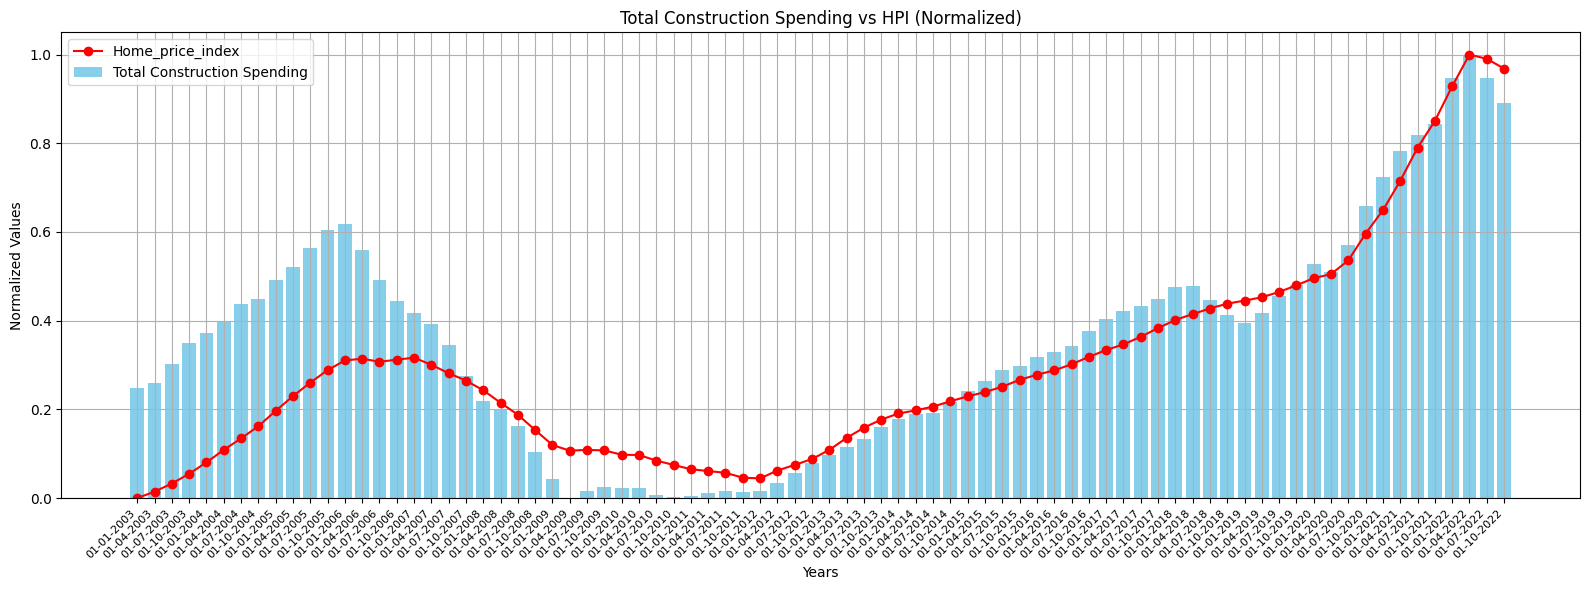

In [173]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[['Total_consumption spending', 'Home_price_index']] = scaler.fit_transform(df1[['Total_consumption spending', 'Home_price_index']])

plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

# Bar chart for CONS_SPNDG (New Housing Units Authorized)
plt.bar(df1['Date'], df1['Total_consumption spending'], color='skyblue', label='Total Construction Spending', )

# Line plot for CSUSHPISA
plt.plot(df1['Date'], df1['Home_price_index'], marker='o', linestyle='-', color='red', label='Home_price_index')

plt.title('Total Construction Spending vs HPI (Normalized)')
plt.xlabel('Years')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and align x-axis tick labels for better readability

plt.tight_layout()  # Ensure all elements fit into the figure area
plt.show()

In [174]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[['Consumer_sentiment', 'Home_price_index']] = scaler.fit_transform(df1[['Consumer_sentiment', 'Home_price_index']])

data = [go.Scatter(x = df1['Date'], y = df1['Home_price_index'],name = 'Housing Price'),
        go.Scatter(x = df1['Date'], y = df1['Consumer_sentiment'], name = 'Consumer Sentiment'),
                                             
       ]
       
layout = {'title': 'Key factors governnig House Price', 'font': dict(size=16),'xaxis':{'range':['01-01-2003','01-10-2022']}}

py.iplot({'data':data,'layout': layout})

# 3. Data Science Model

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [176]:
#spliting data into dependent and independent 

df = df.drop('Date',axis=1)
X = df.drop('Home_price_index',axis=1)
y = df['Home_price_index']

In [177]:
# train test split of data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
# features in train set
features = ['Monthly_supply','Permit','Total_consumption spending','Housing_inventory','30y_mortgage','Consumer_sentiment','Interest_rates','Median_sales_price','GDP']

- The below code performs model selection and evaluation for different regression models, including Linear Regression, Decision Tree, Random Forest, and Support Vector Regression. It uses cross-validation and calculates the average Mean Squared Error (MSE) for each model, selecting the one with the lowest MSE as the best model for predicting the target variable.

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    #'Neural Network': MLPRegressor()
}

results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores
    avg_mse = mse_scores.mean()
    results[model_name] = avg_mse


best_model = min(results, key=results.get)
best_model_instance = models[best_model]


best_model_instance.fit(X_train, y_train)

LinearRegression()

In [179]:
#Calculating and comparing the Mean Squared Error (MSE) of different regression models.
predictions = best_model_instance.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Model Selection Results:")
for model, mse_score in results.items():
    print(f"{model}: MSE={mse_score}")
    
#selecting the best model with the lowest MSE and evaluating its performance on the testing set
print(f"\nBest Model: {best_model}")
print(f"Best Model MSE on Testing Set: {mse}")

Model Selection Results:
Linear Regression: MSE=16.53881705773461
Decision Tree: MSE=225.89881818181826
Random Forest: MSE=69.67366313030224
Support Vector Regression: MSE=1706.4378603264718

Best Model: Linear Regression
Best Model MSE on Testing Set: 9.878796268782303


In [180]:
from sklearn.metrics import r2_score
# Computing R-squared score
r2 = r2_score(y_test, predictions)

print("R-squared score:", r2)

R-squared score: 0.990021770676004


In [181]:
#Fit best model and print coefficients for feature interpretation.
best_model_instance.fit(X_train, y_train)

coefficients = best_model_instance.coef_


print("Coefficients:")
for feature, coefficient in zip(features, coefficients):
    print(f"{feature}: {coefficient}")

Coefficients:
Monthly_supply: 2.7694221175297233
Permit: -0.010775934460691416
Total_consumption spending: 0.00015207846440168891
Housing_inventory: -0.001953124802593504
30y_mortgage: -2.4446857829383384
Consumer_sentiment: -0.26763187819901324
Interest_rates: 2.3711429260068577
Median_sales_price: 3.715651289747232e-05
GDP: 0.004029939681530502


In [182]:
from scipy import stats
confidence = 0.95
#Computing 95% confidence interval for RMSE of model's predictions
squared_errors = (predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([2.17715849, 3.8752514 ])

# 4. Conclusion

Factors that significantly influence home prices based on the provided coefficients are:

1. **Monthly Supply**: This factor has the most substantial positive impact on home prices, suggesting that a decrease in the monthly supply of houses tends to increase home prices.

2. **Interest Rates**: Higher interest rates positively influence home prices, indicating that lower interest rates are associated with higher home prices.

3. **GDP**: A higher Gross Domestic Product (GDP) is positively linked to increased home prices, implying that economic growth can boost home prices.

4. **Total Consumption Spending**: Although the effect is relatively small, higher total consumption spending has a positive influence on home prices.

Factors with less significant impacts include:

1. **Permits**: The number of permits has a minor negative impact on home prices.

2. **Housing Inventory**: An increase in housing inventory slightly reduces home prices.

3. **Consumer Sentiment**: Lower consumer sentiment has a negative effect on home prices.

4. **Median Sales Price**: This factor has a very minimal positive impact on home prices.

The most influential factors appear to be the monthly supply of houses, interest rates, and GDP, which play crucial roles in shaping home prices.